##### $\hspace{15pt}$ **Filename: pretrainedImageRecognitionModels.ipynb**
##### $\hspace{1.5pt}$ **Date Created: September 27, 2023**
##### **Date Modified: November 16, 2023**
##### $\rule{10.5in}{1pt}$
##### **Load and run two pretrained image-recognition models. The models are called [AlexNet](https://papers.nips.cc/paper_files/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) and [ResNet](https://arxiv.org/abs/1512.03385). These models were trained on a subset of the [ImageNet](https://imagenet.stanford.edu) dataset. Each model is run on an image that was taken from a [Kaggle dataset](https://www.kaggle.com/datasets/alessiocorrado99/animals10). The content of this notebook is based on the example provided in section 2.1 of the book [Deep Learning with Pytorch](https://www.manning.com/books/deep-learning-with-pytorch). Some changes were made in the presentation of the content as well as in the image that was loaded for demonstration purposes.**
##### $\rule{10.5in}{1pt}$

##### Load modules and packages.

In [1]:
from google.colab import drive
from PIL import Image
from torchvision import models, transforms
import pandas as pd
import torch

##### Set the float format of pandas dataframes.

In [2]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [3]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Load an image from Google Drive.

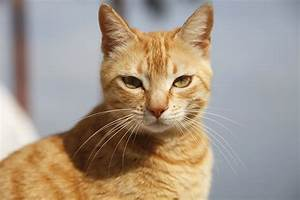

In [4]:
image = Image.open("gdrive/MyDrive/Colab Notebooks/1_pretrainedImageRecognitionModels/cat.jpg")
image

##### Define a pipeline of preprocessing functions.

In [5]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

##### Apply the preprocessing pipeline to the image.

In [6]:
preprocessedImage = preprocess(image)
unsqueezedImage = torch.unsqueeze(preprocessedImage, 0)

##### Get the labels for the ImageNet dataset classes.

In [7]:
with open("gdrive/MyDrive/Colab Notebooks/1_pretrainedImageRecognitionModels/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

$\hspace{1in}$

###### **AlexNet**

##### Create an instance of AlexNet.

In [8]:
alexnet = models.alexnet(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 97.1MB/s]


##### Run the pretrained AlexNet model on the image.

In [9]:
alexnet.eval()
output = alexnet(unsqueezedImage)
output

tensor([[-1.9673e+00, -1.4102e+00, -6.2893e+00, -4.3692e+00, -5.1474e-02,
          3.4336e+00, -5.3089e+00, -2.6077e+00, -7.8686e-02, -8.6400e-01,
         -1.2088e+00, -6.7634e-01, -2.8053e+00, -3.3995e+00, -3.5364e+00,
         -3.3360e+00, -2.2672e+00,  1.1320e-02, -3.9500e+00, -5.3756e+00,
         -1.1800e+00,  2.6584e+00, -9.3174e-01, -3.3363e+00, -4.3959e+00,
         -4.4646e+00, -3.3795e+00, -5.2021e+00, -2.0478e+00, -1.3940e+00,
         -6.3877e+00, -5.1259e+00, -4.2451e+00, -2.4570e+00, -1.8514e+00,
         -3.3522e+00, -3.0702e-01, -3.5438e+00,  2.6550e-01, -5.0841e+00,
         -4.7516e+00, -1.5863e+00, -3.9715e+00, -3.8422e+00,  4.2817e-01,
         -4.4830e+00, -4.5264e+00, -7.9322e-01, -6.2570e+00, -6.9971e+00,
         -5.5141e+00, -9.3884e-01,  8.0693e-01, -2.5545e+00, -2.5239e+00,
         -5.1824e+00,  1.7316e-02, -3.2759e+00, -3.2986e+00, -7.2001e-01,
         -2.1258e+00, -3.5664e+00, -1.3282e+00, -2.0919e+00, -2.3974e+00,
         -4.5495e+00,  2.3608e+00, -1.

##### List the five predicted labels with the highest probabilities.

In [10]:
percentage = 100*torch.nn.functional.softmax(output, dim = 1)[0]
_, indices = torch.sort(output, descending = True)

predictedLabels = pd.DataFrame({"label": [labels[idx] for idx in indices[0]],
                                "probability": [percentage[idx].item() for idx in indices[0]]})
predictedLabels.head()

,label,probability
0,Egyptian cat,57.6540
1,"tabby, tabby cat",21.6583
2,tiger cat,13.1631
3,"bow tie, bow-tie, bowtie",1.4586
4,"lens cap, lens cover",1.3046


$\hspace{1in}$

##### **ResNet**

##### Create an instance of a 101-layer ResNet.

In [11]:
resnet = models.resnet101(pretrained = True)
resnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 85.4MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### Run the pretrained ResNet model on the image.

In [12]:
resnet.eval()
output = resnet(unsqueezedImage)
output

tensor([[ 1.7203e-02, -3.3702e-01, -2.6123e+00, -1.5335e+00, -2.7528e+00,
          1.3216e-01, -4.4743e+00, -2.6115e+00, -4.7116e-01, -2.6891e+00,
         -1.0058e-01, -3.4159e+00, -1.5813e+00, -3.9786e+00, -2.2530e+00,
         -2.6113e-01, -8.4202e-01, -1.8587e+00, -3.1544e+00, -4.5460e+00,
         -2.3004e+00, -1.9285e-01, -2.1883e+00, -1.9840e+00, -2.7176e+00,
         -1.1735e+00, -6.7458e-01, -3.5636e-01, -1.6628e+00, -1.4812e+00,
         -3.0243e+00, -3.3624e+00, -1.2196e+00, -2.8049e+00, -1.5355e+00,
         -2.2667e+00, -6.8439e-01, -1.4208e+00,  7.9066e-01, -7.8921e-01,
         -2.7957e+00,  1.0386e+00, -6.9023e-01,  1.1533e+00, -4.5016e-01,
         -1.0821e+00, -1.2599e+00, -6.4332e-02, -1.8809e+00, -3.7855e+00,
         -3.2717e+00,  9.3224e-01, -1.4245e-01, -1.7498e+00, -6.6723e-01,
         -3.7415e+00, -2.9945e+00, -1.7691e+00, -2.4967e+00,  5.7281e-01,
         -1.5335e+00, -2.3176e+00,  2.0276e-01,  6.3503e-01, -7.0040e-01,
         -1.8912e+00,  3.2222e+00,  5.

##### List the five predicted labels with the highest probabilities.

In [13]:
percentage = 100*torch.nn.functional.softmax(output, dim = 1)[0]
_, indices = torch.sort(output, descending = True)

predictedLabels = pd.DataFrame({"label": [labels[idx] for idx in indices[0]],
                                "probability": [percentage[idx].item() for idx in indices[0]]})
predictedLabels.head()

,label,probability
0,Egyptian cat,59.0967
1,"tabby, tabby cat",16.6017
2,tiger cat,14.9467
3,"lynx, catamount",2.4119
4,velvet,1.6619
